# Statistics Tutorial - Lesson 5
# Linear Regression

[Linear Regression](https://en.wikipedia.org/wiki/Linear_regression) is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables.

In statistics, we are interested in searching relationships amongst variables so that we can understand how several variables are related as well as we can forcast a response. Sometimes outliers, where are not unexpected in the dataset or is way too far from the expected range, can be identified. This process is called [Regression Analysis](https://en.wikipedia.org/wiki/Regression_analysis). 

If there is only one explanatory variable in a linear modelling approach, i.e.
$$ y = mx + c$$

, it is called [Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression); for more than one, the process is called Multiple Linear Regression.

Here is a technique to solve Simple Linear Regression is called [Least Square Method](https://en.wikipedia.org/wiki/Linear_least_squares). The procedure is the following:
1. Find means and standard deviation values of x and y data, as well as their correlation coefficient value.
2. Find the slope *m* of the best fitting line by 
$$ m = \rho_{x,y}(\frac{\sigma_y}{\sigma_x}) $$
3. Find the y-intercept *c* of the line by
$$ c = \overline{y} - m\overline{x} $$

In [1]:
# Example 1
import math

def get_mean(given_list):
    """
    Function for calculating arithmetic mean
    """
    return sum(given_list)/len(given_list)
def get_sd(given_list):
    """
    Function for calculating standard deviation
    """
    mean = get_mean(given_list)
    return math.sqrt(get_mean([math.pow(x - mean, 2) for x in given_list]))
def get_cov_1(list1, list2):
    """
    Function for calculating covariance (formula 1)
    """
    mean1 = get_mean(list1)
    mean2 = get_mean(list2)
    return get_mean([(x - mean1) * (y - mean2) for (x, y) in zip(list1, list2)])
def get_corr(list1, list2):
    """
    Function for calculating correlation coefficient
    """
    return get_cov_1(list1, list2) / (get_sd(list1) * get_sd(list2))

# Source Data
stock_prices = [487, 487, 492, 509, 522, 538, 528, 527, 543, 550]
time_index = range(len(stock_prices))

# Step 1
mean_x = get_mean(time_index)
mean_y = get_mean(stock_prices)
std_x = get_sd(time_index)
std_y = get_sd(stock_prices)
corr = get_corr(time_index, stock_prices)

# Step 2
m = corr * (std_y / std_x)

# Step 3
c = mean_y - m * mean_x

print('Line: y = {m:.2f} * x + {c:.2f}'.format(m=m, c=c))

Line: y = 7.32 * x + 485.38


In [2]:
# Example 2
# by NumPy
import numpy as np

x_array = np.array(time_index)
y_array = np.array(stock_prices)
A = np.vstack([x_array, np.ones(len(x_array))]).T
# using Y = Ap, where A = [[x 1]] and p = [[m], [c]]
m, c = np.linalg.lstsq(A, y_array, rcond=None)[0]

print('Line: y = {m:.2f} * x + {c:.2f}'.format(m=m, c=c))

Line: y = 7.32 * x + 485.38


After calculating m and c, you can draw the best fitting line by Linear Equation.

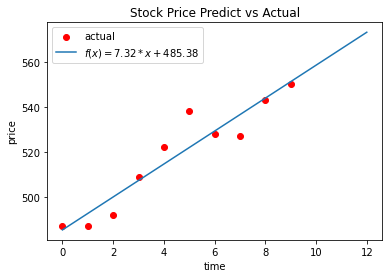

In [3]:
import matplotlib.pyplot as plt

# plot actual
plt.scatter(time_index, stock_prices, c='r', label='actual')

# plot predict
x_func = np.linspace(0, int(len(x_array) *1.2))
y_func = m * x_func + c
plt.plot(x_func, y_func, label='$f(x) = {m:.2f} * x + {c:.2f}$'.format(m=m, c=c))

plt.xlabel('time')
plt.ylabel('price')
plt.title('Stock Price Predict vs Actual')
plt.legend()
plt.show()